### Importación de datos



In [184]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [185]:
# cambios en nombres de rows

tienda = tienda.rename(columns={'Costo de envío': 'Costo de Envío', 'Método de pago': 'Método de Pago', 'Cantidad de cuotas': 'Cantidad de Cuotas', 'lat': 'Latitud', 'lon': 'Longitud'})
tienda2 = tienda2.rename(columns={'Costo de envío': 'Costo de Envío', 'Método de pago': 'Método de Pago', 'Cantidad de cuotas': 'Cantidad de Cuotas', 'lat': 'Latitud', 'lon': 'Longitud'})
tienda3 = tienda3.rename(columns={'Costo de envío': 'Costo de Envío', 'Método de pago': 'Método de Pago', 'Cantidad de cuotas': 'Cantidad de Cuotas', 'lat': 'Latitud', 'lon': 'Longitud'})
tienda4 = tienda4.rename(columns={'Costo de envío': 'Costo de Envío', 'Método de pago': 'Método de Pago', 'Cantidad de cuotas': 'Cantidad de Cuotas', 'lat': 'Latitud', 'lon': 'Longitud'})

tienda4.head(2)

,Producto,Categoría del Producto,Precio,Costo de Envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de Pago,Cantidad de Cuotas,Latitud,Longitud
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782


# 1. Análisis-de-facturación

#### Análisis sin gráfico

In [186]:
# facturación total de cada tienda (4)
import numpy as np

# fn que accede a la col "precio" de una tienda y devuelve la suma de todos sus valores
def facturacion(tienda): 
    return tienda['Precio'].sum()

# def diccionario (fabricación de pares clave-valor con la fn recién creada)
resultados = {
    'tienda': int(facturacion(tienda)), 
    'tienda2': int(facturacion(tienda2)),
    'tienda3': int(facturacion(tienda3)),
    'tienda4': int(facturacion(tienda4))
}

# cálculo de media por si hiciera falta
media_facturaciones = np.mean(list(resultados.values()))
print(f'La media de las facturaciones es: {media_facturaciones}\n')
print(f'Facturación total de cada tienda: {resultados}')

La media de las facturaciones es: 1100904800.0

Facturación total de cada tienda: {'tienda': 1150880400, 'tienda2': 1116343500, 'tienda3': 1098019600, 'tienda4': 1038375700}


In [187]:
# presentando los valores con mayor prolijidad
print('Facturación total de cada tienda:')
for tiendax, facturacion in resultados.items():
    print(f'{tiendax} = ${facturacion:,.0f}') 
    

# :     -> iniciador f-string, seguido del 
# ,     -> separador de unidad de mil
# .0f   -> formato de punto fijo con 0 decimales

Facturación total de cada tienda:
tienda = $1,150,880,400
tienda2 = $1,116,343,500
tienda3 = $1,098,019,600
tienda4 = $1,038,375,700


#### Análisis con gráfico

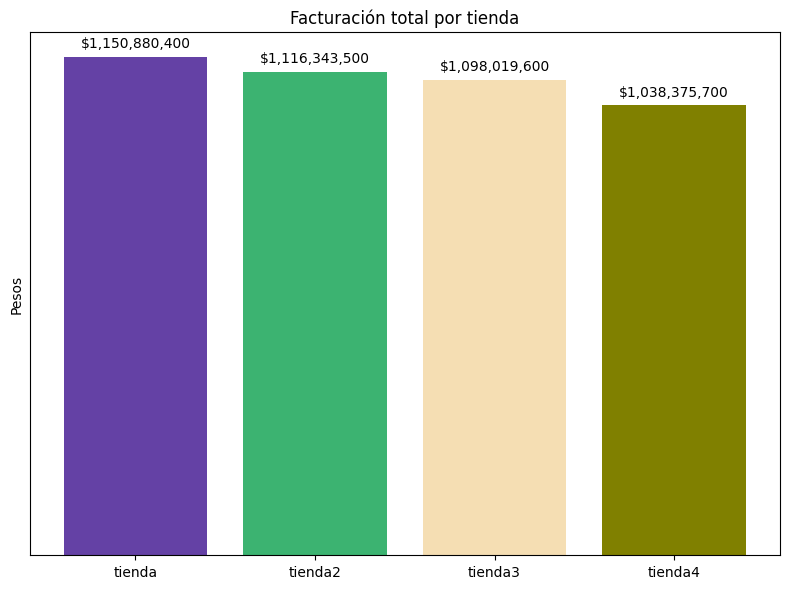

In [ ]:


import matplotlib.pyplot as plt

# ejes
nombres = list(resultados.keys())           # x
montos = list(resultados.values())          # y

# lienzo
fig, ax = plt.subplots(figsize=(8,6))

colores = ['#6441a5', 'mediumseagreen', 'wheat', 'olive']

# Graficar barras
ax.bar(nombres, montos, color=colores) # color twitch
ax.set_title('Facturación total por tienda')
ax.set_ylabel('Pesos')

# Anotar cada barra con su valor
for i, monto in enumerate(montos): 
    ax.text(i, monto + max(montos)*0.02, f'${monto:,}', ha='center') # coloca la etiqueta 2% arriba de la bar

plt.yticks([])
plt.tight_layout()
plt.show()





# 2. Ventas por categoría

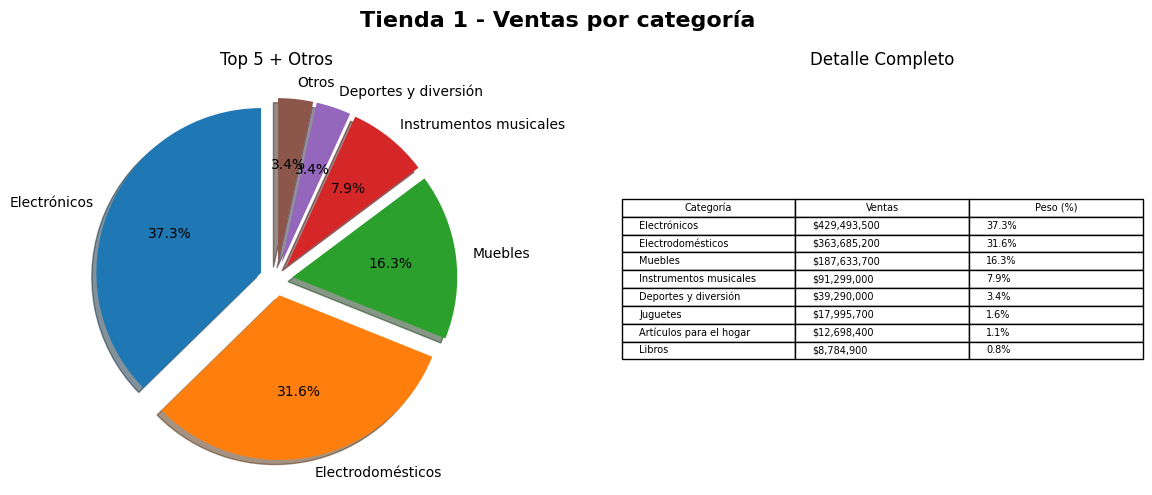

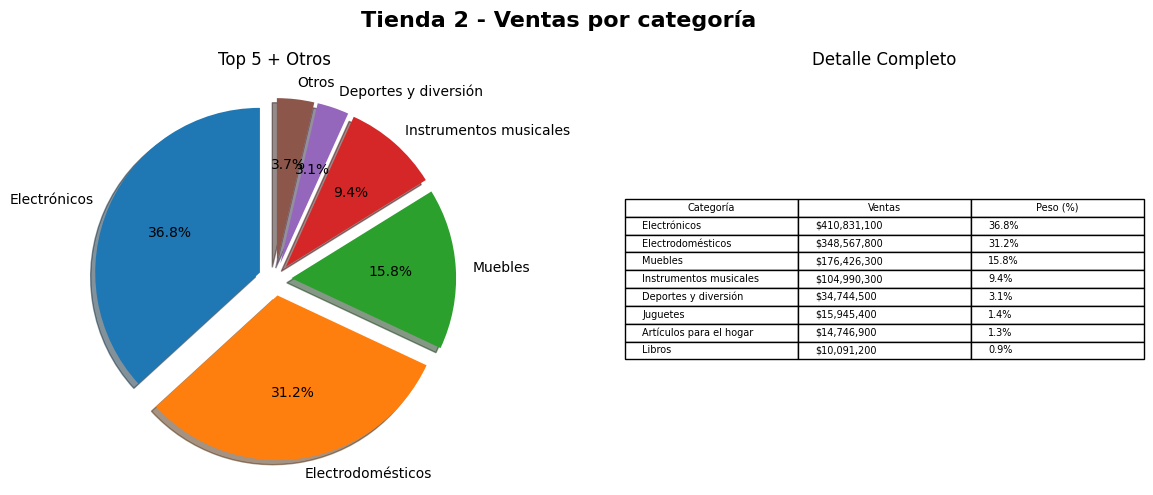

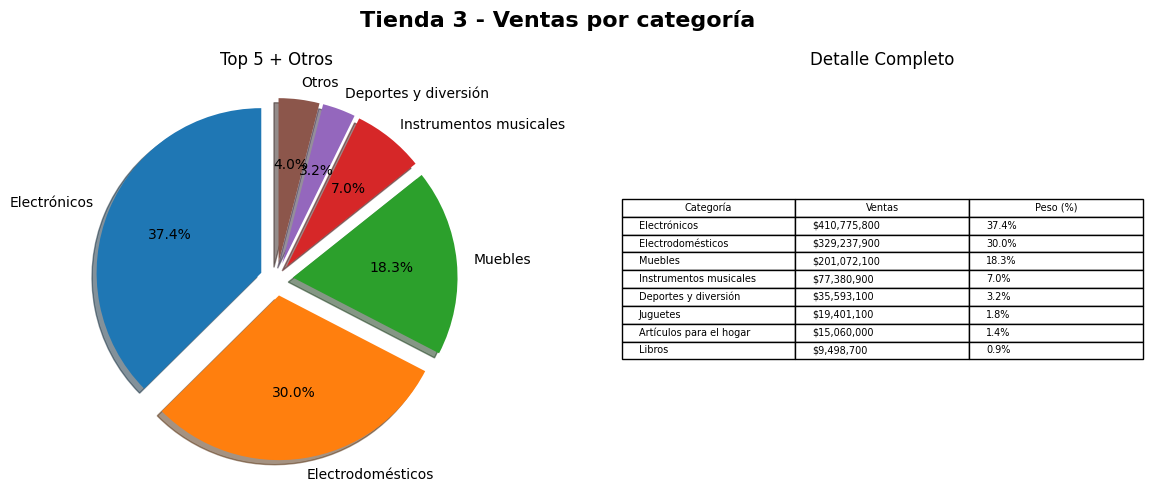

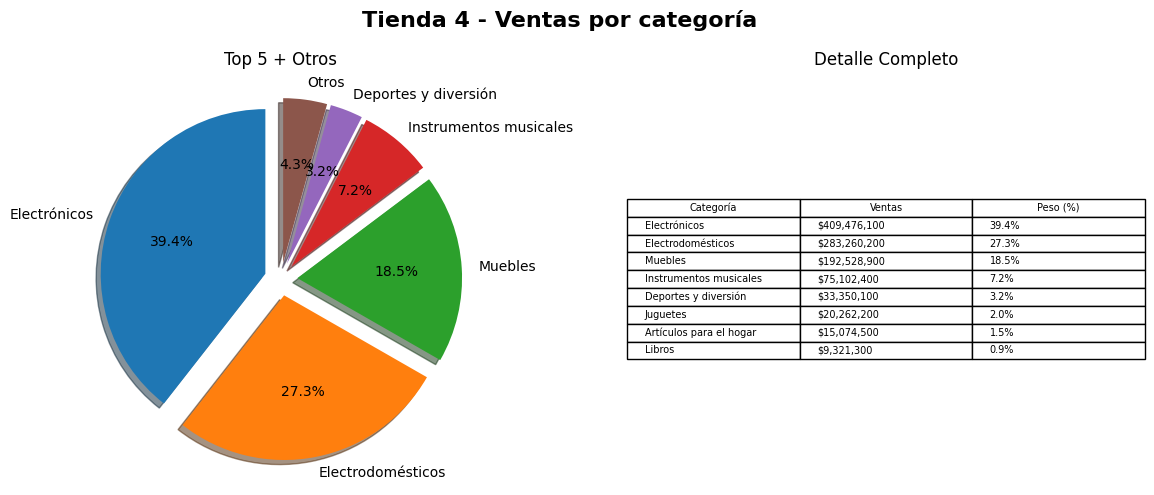

In [189]:
# Gráfico de torta + tabla
import matplotlib.pyplot as plt


def grafico_combinado(df, nombre):
    df['Precio'] = pd.to_numeric(df['Precio'])
    ventas = df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
    
    fig = plt.figure(figsize=(12, 5))
    
    # Gráfico de torta (solo top 5 + otros)
    ax1 = plt.subplot(1, 2, 1)          #ax1 = torta
    top5 = ventas.head(5)
    otros = ventas[5:].sum()
    if otros > 0:
        pie_data = pd.concat([top5, pd.Series({'Otros': otros})])
    else:
        pie_data = top5
    
    ax1.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', shadow=True,
            explode=[0.1]*len(pie_data), startangle=90)
    ax1.set_title('Top 5 + Otros')
    
    # Tabla con todos
    ax2 = plt.subplot(1, 2, 2)          #a asignación de 1 fila × 2 columnas, en la posición 2 (la derecha). En realidad es un gráfico plt mas.
    ax2.axis('off')                     # elimina los ejes x,y y el marco del subplot
    tabla = ax2.table(cellText=[[cat, f'${val:,.0f}', f'{val/ventas.sum()*100:.1f}%'] #  "list comprehension" de lista de listas. cat=categoria
                               for cat, val in ventas.items()],
                      colLabels=['Categoría', 'Ventas', 'Peso (%)'], # headers de la tabla
                      cellLoc='left', loc='center') # alineación de la tabla
    ax2.set_title('Detalle Completo')
    
    plt.suptitle(f'{nombre} - Ventas por categoría', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Uso
grafico_combinado(tienda, 'Tienda 1')
grafico_combinado(tienda2, 'Tienda 2')
grafico_combinado(tienda3, 'Tienda 3')
grafico_combinado(tienda4, 'Tienda 4')

# 3. Calificación promedio de la tienda


#### Análisis sin gráfico

In [ ]:

def promedio_calificacion(tienda):
    return round(tienda['Calificación'].mean(), 2)

In [192]:
calificaciones_promedio = {
    'tienda': float(promedio_calificacion(tienda)),
    'tienda2': float(promedio_calificacion(tienda2)),
    'tienda3': float(promedio_calificacion(tienda3)),
    'tienda4': float(promedio_calificacion(tienda4))
}

# media de calificaciones
media_calificaciones = np.mean(list(calificaciones_promedio.values()))

print(f'media de calificaciones: {media_calificaciones}\n')
print(f'calificaciones: {calificaciones_promedio}')


media de calificaciones: 4.0175

calificaciones: {'tienda': 3.98, 'tienda2': 4.04, 'tienda3': 4.05, 'tienda4': 4.0}


In [193]:
# presentando los valores con mayor prolijidad
print("Calificación promedio por tienda:")
for nombre, calificacion in calificaciones_promedio.items():
    print(f"{nombre}: {calificacion} estrellas")

Calificación promedio por tienda:
tienda: 3.98 estrellas
tienda2: 4.04 estrellas
tienda3: 4.05 estrellas
tienda4: 4.0 estrellas


In [194]:
# ¿cuál es la tienda con mejor puntaje?
mejor_tienda = max(calificaciones_promedio, key=calificaciones_promedio.get) 
mejor_valor = calificaciones_promedio[mejor_tienda]
print(f"\nLa tienda mejor puntuada es {mejor_tienda} con {mejor_valor} estrellas.")


La tienda mejor puntuada es tienda3 con 4.05 estrellas.


#### Análisis con gráfico

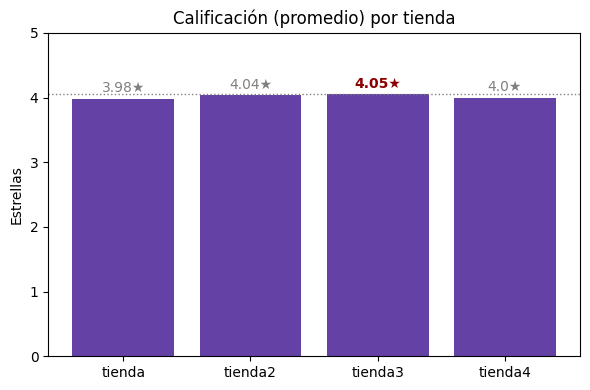

In [195]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
tiendas = list(calificaciones_promedio.keys())      # variables
valores = list(calificaciones_promedio.values())    # variables

plt.bar(tiendas, valores, color='#6441a5') # color twitch
plt.title('Calificación (promedio) por tienda')
plt.ylabel('Estrellas')
plt.ylim(0, 5) #limites de y

# Línea horizontal para destacar la mejor calificación
plt.axhline(y=mejor_valor, color='gray', linestyle='dotted', linewidth=1)

# Cada barra con su valor promedio (con ayuda de IA)
for i, (nombre, valor) in enumerate(calificaciones_promedio.items()):
    color = 'gray' if nombre != mejor_tienda else 'darkred'
    peso = 'bold' if nombre == mejor_tienda else 'normal'
    plt.text(i, valor + 0.1, f'{valor}★', ha='center', color=color, weight=peso)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Análisis sin gráfico

In [ ]:
# .idxmax() - > en pandas devuelve el índice (etiqueta) del valor máximo dentro de una Serie o DataFrame

def extremos_ventas(df):
    contador = df['Producto'].value_counts()
    producto_mas_vendido = contador.idxmax()
    ventas_max = contador.max()
    producto_menos_vendido = contador.idxmin()
    ventas_min = contador.min()
    return producto_mas_vendido, ventas_max, producto_menos_vendido, ventas_min


In [197]:

tiendas_dict = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas_dict.items():
    mas, cant_mas, menos, cant_menos = extremos_ventas(df)
    print(f"{nombre}:")
    print(f"  Más vendido: {mas} ({cant_mas} ventas)")
    print(f"  Menos vendido: {menos} ({cant_menos} ventas)\n")

Tienda 1:
  Más vendido: Microondas (60 ventas)
  Menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
  Más vendido: Iniciando en programación (65 ventas)
  Menos vendido: Juego de mesa (32 ventas)

Tienda 3:
  Más vendido: Kit de bancas (57 ventas)
  Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
  Más vendido: Cama box (62 ventas)
  Menos vendido: Guitarra eléctrica (33 ventas)



#### Análisis con gráfico

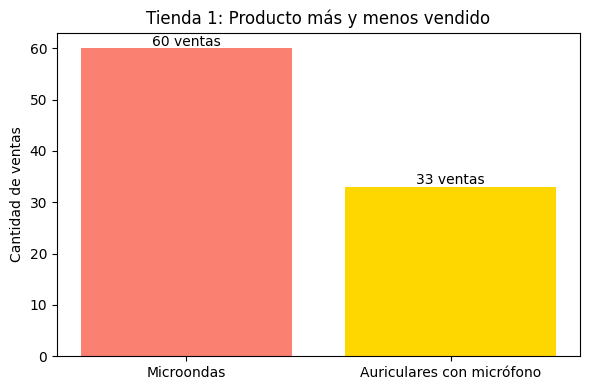

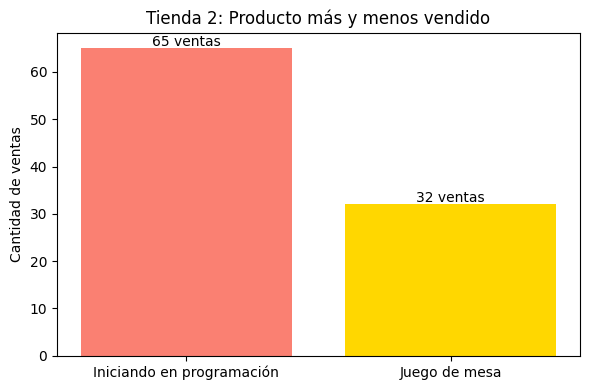

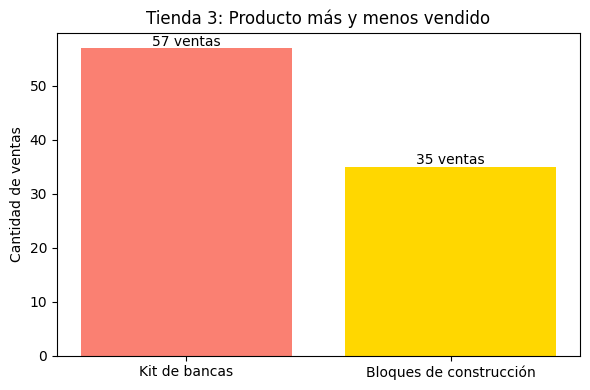

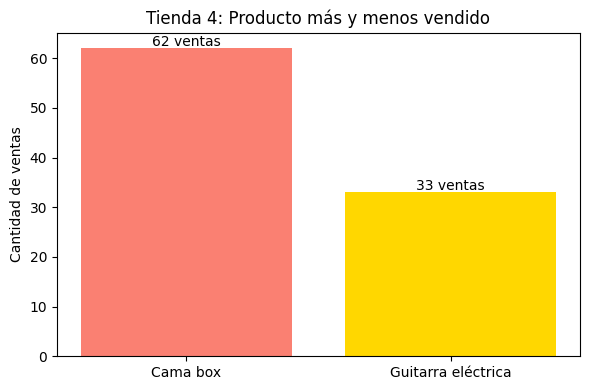

In [203]:
# sé que código no es de lo mas eficiente y se puede mejorar, pero al menos es mío y mantiene una cantidad acotada de código. 
import matplotlib.pyplot as plt

def graficar_extremos_ventas(df, nombre_tienda):
    prod_max, ventas_max, prod_min, ventas_min = extremos_ventas(df)
    productos = [prod_max, prod_min]
    ventas = [ventas_max, ventas_min]
    colores = ['salmon', 'gold']

    plt.figure(figsize=(6, 4))
    plt.bar(productos, ventas, color=colores)
    for i in range(2):
        plt.text(i, ventas[i] + 0.5, f"{ventas[i]} ventas", ha='center')
    plt.title(f'{nombre_tienda}: Producto más y menos vendido')
    plt.ylabel('Cantidad de ventas')
    plt.tight_layout()
    plt.show()


graficar_extremos_ventas(tienda, 'Tienda 1')
graficar_extremos_ventas(tienda2, 'Tienda 2')
graficar_extremos_ventas(tienda3, 'Tienda 3')
graficar_extremos_ventas(tienda4, 'Tienda 4')

# 5. Costo de envío promedio por tienda

#### Análisis sin gráfico

In [175]:

def costo_promedio_envio(tienda):
    return round(tienda['Costo de Envío'].mean(), 2)

# clave-valor > {tiendax: costo}
costo_envios_promedio = {
    'tienda': costo_promedio_envio(tienda),
    'tienda2': costo_promedio_envio(tienda2),
    'tienda3': costo_promedio_envio(tienda3),
    'tienda4': costo_promedio_envio(tienda4),
}

# media y mediana de costos de envio
media_costos_envio = np.mean(list(costo_envios_promedio.values()))
mediana_costos_envio = np.median(list(costo_envios_promedio.values()))
print(f'La media de las facturaciones es: {media_costos_envio}\nLa mediana de las facturaciones es: {mediana_costos_envio}')


La media de las facturaciones es: 24874.997499999998
La mediana de las facturaciones es: 25010.96


In [176]:
# presentando los valores con mayor prolijidad

for nombre, costo in costo_envios_promedio.items():
    print(f'{nombre}: ${costo}')

tienda: $26018.61
tienda2: $25216.24
tienda3: $24805.68
tienda4: $23459.46


In [177]:
# identificando al "ganador". 
# del diccionario costo_envios_promedio, recorre las claves.
# key=x.get indica que la comparacion se hace según los valores asociados a cada clave 

mas_barato = min(costo_envios_promedio, key=costo_envios_promedio.get)
print(f'Tienda con menores costos de envío: \n{mas_barato} por ${costo_envios_promedio[mas_barato]}')

Tienda con menores costos de envío: 
tienda4 por $23459.46


#### Análisis con gráfico

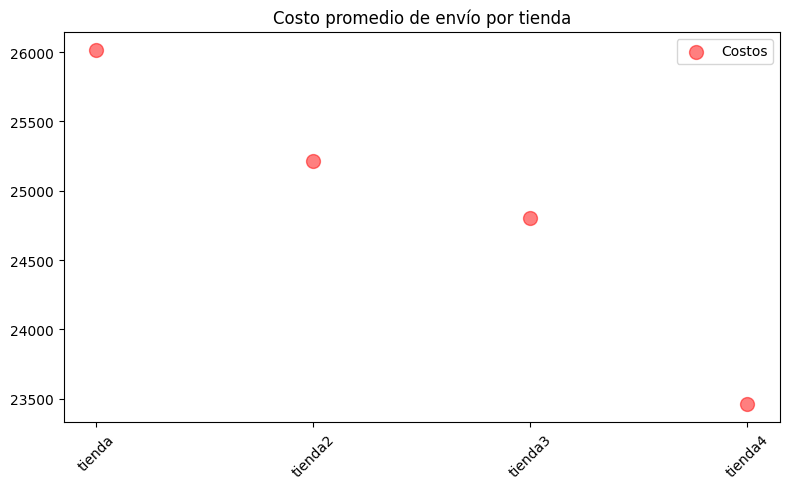

In [204]:
import matplotlib.pyplot as plt

# scatter es usado para evaluar correlaciones, sin embargo me pareció práctico usarlo de este modo
tiendas = list(costo_envios_promedio.keys())
costos = list(costo_envios_promedio.values())

plt.figure(figsize=(8, 5))
plt.scatter(tiendas, costos, color="red", 
                            alpha=0.5, 
                            s=100,
                            label="Costos" 
)  
plt.title("Costo promedio de envío por tienda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Informe Final

---

#### El <b>propósito</b> de este informe y sus gráficos es ayudar al señor <b>Juan</b> a decidir cuál de sus tiendas es la que menos valor genera, sea por ingresos totales, categorías mas y menos vendidas, calificaciones promedio de los clientes, productos mas y menos vendidos, y también por costes promedio de envío por tienda.

---

<b>Facturación (por orden descendiente):</b>

`tienda1 = $1,150,880,400` <br>
`tienda2 = $1,116,343,500` <br>
`tienda3 = $1,098,019,600` <br>
`tienda4 = $1,038,375,700` <br>

* Valores debajo de la media ($1,100,904,800.0) -> [tienda 3]() y [tienda 4]()
* La [tienda 4]() fue la de peores resultados , habiendo generado $112,504,700 menos que la tienda con mejores resultados, es decir, la [tienda 1]().

<b>Costos de envío (por orden descendiente):</b>

`tienda1: $26018.61` <br>
`tienda2: $25216.24` <br>
`tienda3: $24805.68` <br>
`tienda4: $23459.46` <br>

* Valores debajo de la media ($24874.99) -> [tienda 3]() y [tienda 4]()

<b>Facturación - costos de envío (por orden descendiente):</b>

`t1	1150880400 - 26018.61	= 1,150,854,381.39` <br>
`t2	1116343500 - 25216.24	= 1,116,318,283.76` <br>
`t3	1098019600 - 24805.68	= 1,097,994,794.32` <br>
`t4	1038375700 - 23459.46	= 1,038,352,240.54` <br>

* Si bien la [tienda 4]() presenta los costos de envío mas bajos, sigue siendo la de peores resultados si tomamos facturación - costos de envío.

<b>Calificación promedio del público:</b>

`tienda: 3.98 estrellas` (peor valorada)<br>
`tienda2: 4.04 estrellas` <br>
`tienda3: 4.05 estrellas` (mejor valorada)<br>
`tienda4: 4.0 estrellas` <br>

* [Tienda 4]() es la segunda peor valorada luego de [tienda 3]() y se encuentra por debajo de la media (4.0175)

---

<b>Categorías/productos mas y menos vendidos:</b>

* En cuanto a categorías, se notan leves diferencias en las 5 categorías menos vendidas, mientras que las mas vendidas son las mismas 3, de modo que no parece haber un análisis en esta sección del informe. 

<b>En conclusión y luego de todo lo mencionado, se recomienda vender la [tienda 4]().</b>


# Desafío opcional



* Explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. 
* Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.


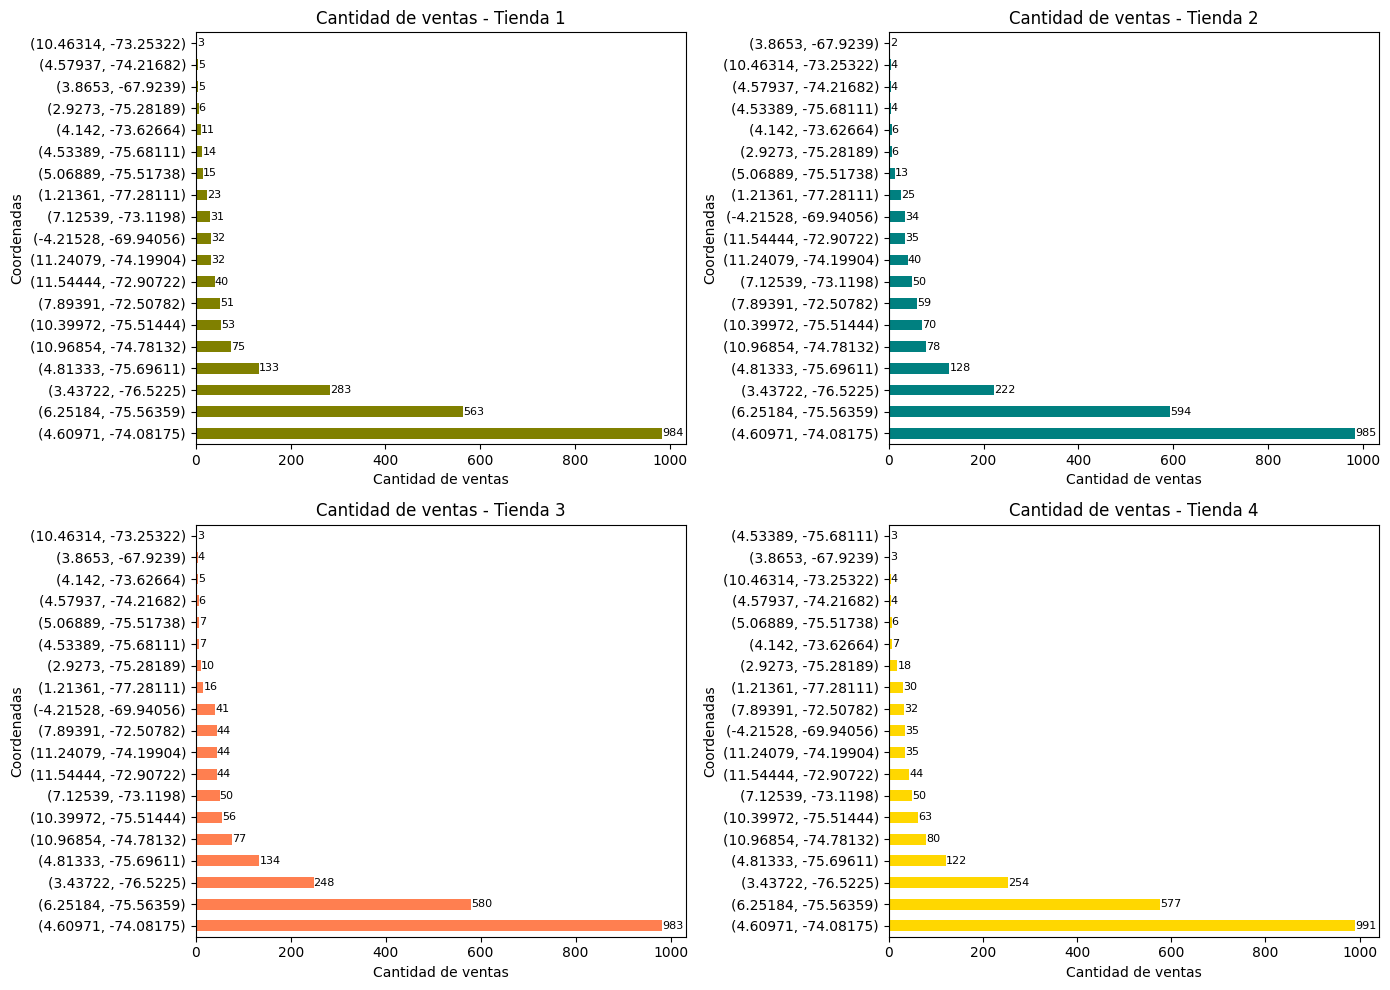

In [179]:

# código hecho con gran ayuda de IA
# El grueso de las ventas se reparte entre Bogotá y Medellín.

tienda_ventas_geograficas = tienda.groupby(['Latitud', 'Longitud']).size().sort_values(ascending=False) 
tienda2_ventas_geograficas = tienda2.groupby(['Latitud', 'Longitud']).size().sort_values(ascending=False) 
tienda3_ventas_geograficas = tienda3.groupby(['Latitud', 'Longitud']).size().sort_values(ascending=False) 
tienda4_ventas_geograficas = tienda4.groupby(['Latitud', 'Longitud']).size().sort_values(ascending=False) 


import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Lista de series, títulos y colores
series = [
    (tienda_ventas_geograficas, 'Tienda 1', 'olive'),
    (tienda2_ventas_geograficas, 'Tienda 2', 'teal'),
    (tienda3_ventas_geograficas, 'Tienda 3', 'coral'),
    (tienda4_ventas_geograficas, 'Tienda 4', 'gold')
]

# Graficar cada serie en su posición 2x2
for ax, (serie, titulo, color) in zip(axs.flat, series):
    serie.plot(kind='barh', ax=ax, color=color)
    ax.set_title(f'Cantidad de ventas - {titulo}')
    ax.set_xlabel('Cantidad de ventas')
    ax.set_ylabel('Coordenadas')

    # Anotar cada barra
    for i, (ubicacion, cantidad) in enumerate(serie.items()):
        ax.text(cantidad + 0.2, i, str(cantidad), va='center', fontsize=8)

plt.tight_layout()
plt.show()



In [180]:
import pandas as pd

ventas_t1 = tienda.groupby(['Latitud', 'Longitud']).size()
ventas_t2 = tienda2.groupby(['Latitud', 'Longitud']).size()
ventas_t3 = tienda3.groupby(['Latitud', 'Longitud']).size()
ventas_t4 = tienda4.groupby(['Latitud', 'Longitud']).size()


# Nuevo df 
df_comparativo = pd.DataFrame({
    'tienda1': ventas_t1,
    'tienda2': ventas_t2,
    'tienda3': ventas_t3,
    'tienda4': ventas_t4
})

df_comparativo

,,tienda1,tienda2,tienda3,tienda4
Latitud,Longitud,,,,
-4.21528,-69.94056,32,34,41,35
1.21361,-77.28111,23,25,16,30
2.92730,-75.28189,6,6,10,18
3.43722,-76.52250,283,222,248,254
3.86530,-67.92390,5,2,4,3
4.14200,-73.62664,11,6,5,7
4.53389,-75.68111,14,4,7,3
4.57937,-74.21682,5,4,6,4
4.60971,-74.08175,984,985,983,991


In [181]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Diccionario con las 4 tiendas (asegurate de que 'tienda', 'tienda2', 'tienda3', 'tienda4' existen)
tiendas_dict = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4,
}

# Colores por tienda (mismo orden que tiendas_dict.keys())
colores = ['blue', 'red', 'green', 'orange']

# Calcular centro del mapa con todas las coordenadas válidas
all_coords = pd.concat(
    [df[['Latitud', 'Longitud']].dropna() for df in tiendas_dict.values()],
    ignore_index=True
)
center = [all_coords['Latitud'].mean(), all_coords['Longitud'].mean()]

# Crear mapa y un MarkerCluster global para mejorar la visualización
mapa = folium.Map(location=center, zoom_start=6)
cluster = MarkerCluster().add_to(mapa)

# Añadir marcadores (CircleMarker) por cada venta, con color por tienda y popup informativo
for (nombre, df), color in zip(tiendas_dict.items(), colores):
    df_valid = df.dropna(subset=['Latitud', 'Longitud'])
    # opcional: agrupar ubicaciones repetidas si interesa
    for _, row in df_valid.iterrows():
        popup = f"<b>{nombre}</b><br>{row.get('Producto', '')}"
        if 'Precio' in row:
            try:
                popup += f"<br>Precio: ${int(row['Precio']):,}"
            except Exception:
                pass
        folium.CircleMarker(
            location=[row['Latitud'], row['Longitud']],
            radius=4,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=folium.Popup(popup, max_width=300)
        ).add_to(cluster)

# Guardar mapa
mapa.save('mapa_ventas_todas_las_tiendas.html')
print("Mapa guardado como 'mapa_ventas_todas_las_tiendas.html'")

Mapa guardado como 'mapa_ventas_todas_las_tiendas.html'
